In [16]:
import torch
from torch_geometric.data import Data
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from torch_geometric.datasets import QM9
import numpy as np
from torch.utils.data import random_split
# import jax
import matplotlib.pyplot as plt
import os

In [17]:
qm9 = QM9(os.path.join(os.getcwd(), 'qm9_data'))

In [18]:
for d in qm9:
    print(d)
    print(d.z)
    print(d.pos)
    break


Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], z=[5], name='gdb_1', idx=[1])
tensor([6, 1, 1, 1, 1])
tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,  3.0000e-04],
        [-5.4080e-01,  1.4475e+00, -8.7660e-01],
        [-5.2380e-01,  1.4379e+00,  9.0640e-01]])


In [19]:
features = []
labels = []

for d in qm9:
    features.append(d.pos.numpy())
    labels.append(d.y[0][7].numpy())
    
print(len(features), len(labels))

130831 130831


In [20]:
# Calculate the maximum shape in each dimension
max_shape = tuple(max(sizes) for sizes in zip(*[arr.shape for arr in features]))

# Pad each array to have the same shape
normalized_features = [np.pad(arr, [(0, max_shape[0] - arr.shape[0]), (0, max_shape[1] - arr.shape[1])], mode='constant', constant_values=0) for arr in features]

# Now normalized_features is a list of NumPy arrays of the same shape
print(normalized_features[20])

[[-3.2200e-02  1.5402e+00  1.0700e-02]
 [ 3.3800e-02  7.5000e-03  1.8000e-03]
 [ 7.1380e-01 -5.0860e-01 -1.2730e+00]
 [ 7.3850e-01 -5.2220e-01  1.2575e+00]
 [ 9.7520e-01  1.9741e+00  5.3000e-03]
 [-5.6200e-01  1.9223e+00 -8.6840e-01]
 [-5.4820e-01  1.9127e+00  9.0210e-01]
 [-9.9750e-01 -3.7310e-01  9.8000e-03]
 [ 1.7507e+00 -1.5590e-01 -1.3327e+00]
 [ 7.3450e-01 -1.6033e+00 -1.2994e+00]
 [ 1.9370e-01 -1.6090e-01 -2.1720e+00]
 [ 2.3610e-01 -1.8380e-01  2.1701e+00]
 [ 7.5960e-01 -1.6171e+00  1.2723e+00]
 [ 1.7764e+00 -1.6990e-01  1.3005e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00

In [21]:
labels = np.array(labels)

In [22]:
normalized_features = np.array(normalized_features)

In [23]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


train_labelm = np.mean(labels)
train_labelstd = np.std(labels)

print("Mean = ", train_labelm, "Std =", train_labelstd)

transformed_labels = (labels - train_labelm) / train_labelstd
print(len(transformed_labels))
print(transformed_labels[1])

test_size=0.2
train_features, test_features, train_labels, test_labels = train_test_split(
    normalized_features, transformed_labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

Mean =  -11178.966 Std = 1085.5746
130831
8.880844


In [24]:
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(29, 3)),
    tf.keras.layers.Dense(64, activation='relu'),  # Assuming 3 atoms with 3 coordinates each
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_features, train_labels, epochs=50, batch_size=16, validation_split=0.1)


Epoch 1/50
5888/5888 [==============================] - 10s 2ms/step - loss: 0.5198 - val_loss: 0.4448
Epoch 2/50
5888/5888 [==============================] - 8s 1ms/step - loss: 0.4100 - val_loss: 0.4021
Epoch 3/50
5888/5888 [==============================] - 9s 1ms/step - loss: 0.3769 - val_loss: 0.3849
Epoch 4/50
5888/5888 [==============================] - 8s 1ms/step - loss: 0.3585 - val_loss: 0.3766
Epoch 5/50
5888/5888 [==============================] - 8s 1ms/step - loss: 0.3424 - val_loss: 0.3618
Epoch 6/50
5888/5888 [==============================] - 8s 1ms/step - loss: 0.3316 - val_loss: 0.3508
Epoch 7/50
5888/5888 [==============================] - 8s 1ms/step - loss: 0.3233 - val_loss: 0.3523
Epoch 8/50
5888/5888 [==============================] - 8s 1ms/step - loss: 0.3161 - val_loss: 0.3446
Epoch 9/50
5888/5888 [==============================] - 9s 1ms/step - loss: 0.3104 - val_loss: 0.3463
Epoch 10/50
5888/5888 [==============================] - 8s 1ms/step - loss: 0.30

In [26]:
# Evaluate the model on the test set
loss = model.evaluate(test_features, test_labels)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions
predictions = model.predict(test_features)

818/818 [==============================] - 1s 939us/step - loss: 0.3092
Mean Squared Error on Test Set: 0.3092377185821533
818/818 [==============================] - 1s 810us/step


MSE: 364427.9375
RMSE: 603.6786499023438
R-squared (R2) Score: 0.6964466998197361


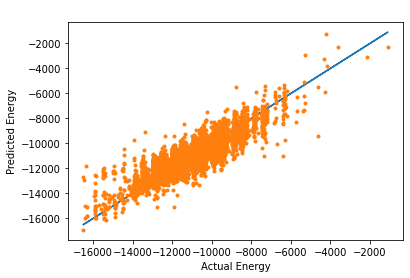

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Inverse transform the transformed labels
predictions = (predictions * train_labelstd) + train_labelm
test_labels = (test_labels * train_labelstd) + train_labelm


mse = mean_squared_error(test_labels, predictions)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(test_labels, predictions)
print("R-squared (R2) Score:", r2)


""" plt.scatter(test_labels, predictions) """
plt.plot(test_labels, test_labels, "-")
plt.plot(test_labels, predictions, ".")
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title(' ')
plt.show()